# Python: Intermediate
## Data Cleaning using Pandas

In this notebook, we will explore the correlations between SAT scores and demographics with factors like race, gender, income, and more. New York City makes its data on high school SAT scores available online, as well as the demographics for each high school. 

The same website has several related data sets covering demographic information and test scores. Here are the links to all of the data sets we'll be using:

SAT scores by school - SAT scores for each high school in New York City
School attendance - Attendance information for each school in New York City
Class size - Information on class size for each school
AP test results - Advanced Placement (AP) exam results for each high school (passing an optional AP exam in a particular subject can earn a student college credit in that subject)
Graduation outcomes - The percentage of students who graduated, and other outcome information
Demographics - Demographic information for each school
School survey - Surveys of parents, teachers, and students at each school
All of these data sets are interrelated. We'll need to combine them into a single data set before we can find correlations.

Below are the files that we are ging to explore:

ap_2010.csv - Data on AP test results
class_size.csv - Data on class size
demographics.csv - Data on demographics
graduation.csv - Data on graduation outcomes
hs_directory.csv - A directory of high schools
sat_results.csv - Data on SAT scores
survey_all.txt - Data on surveys from all schools
survey_d75.txt - Data on surveys from New York City district 


In [128]:
# reading the data
import pandas as pd
data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]
data = {}

for string in data_files:
    read = pd.read_csv("Data Analysis and Visualizations\\Data Cleaning\\{0}".format(string))
    data[string.replace(".csv", "")] = read
    


In [129]:
# Exploring the Data

for key in data:
    print("First five rows for {0}".format(key)+":")
    print(data[key].head()) 

First five rows for ap_2010:
      DBN                             SchoolName AP Test Takers   \
0  01M448           UNIVERSITY NEIGHBORHOOD H.S.              39   
1  01M450                 EAST SIDE COMMUNITY HS              19   
2  01M515                    LOWER EASTSIDE PREP              24   
3  01M539         NEW EXPLORATIONS SCI,TECH,MATH             255   
4  02M296  High School of Hospitality Management               s   

  Total Exams Taken Number of Exams with scores 3 4 or 5  
0                49                                   10  
1                21                                    s  
2                26                                   24  
3               377                                  191  
4                 s                                    s  
First five rows for class_size:
   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1    1       M        

In [130]:
# Reading in the Survey Data
# The survey files are little complicated. These files are tab delimited and encoded with Windows-1252 encoding.

all_survey = pd.read_csv("Data Analysis and Visualizations\\Data Cleaning\\survey_all.txt",encoding="windows-1252",delimiter="\t")
all_survey.head()


,dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,...,s_N_q14e_3,s_N_q14e_4,s_N_q14f_1,s_N_q14f_2,s_N_q14f_3,s_N_q14f_4,s_N_q14g_1,s_N_q14g_2,s_N_q14g_3,s_N_q14g_4
0,01M015,M015,P.S. 015 Roberto Clemente,0,No,0.0,Elementary School,NaN,88,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M019,M019,P.S. 019 Asher Levy,0,No,0.0,Elementary School,NaN,100,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01M020,M020,P.S. 020 Anna Silver,0,No,0.0,Elementary School,NaN,88,73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01M034,M034,P.S. 034 Franklin D. Roosevelt,0,Yes,0.0,Elementary / Middle School,89.0,73,50,...,20.0,16.0,23.0,54.0,33.0,29.0,31.0,46.0,16.0,8.0
4,01M063,M063,P.S. 063 William McKinley,0,No,0.0,Elementary School,NaN,100,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
d75_survey = pd.read_csv("Data Analysis and Visualizations\\Data Cleaning\\survey_d75.txt",encoding="windows-1252",delimiter="\t")
d75_survey.head()


,dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,...,s_q14_2,s_q14_3,s_q14_4,s_q14_5,s_q14_6,s_q14_7,s_q14_8,s_q14_9,s_q14_10,s_q14_11
0,75K004,K004,P.S. K004,1,Yes,0.0,District 75 Special Education,38.0,90,72,...,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,75K036,K036,P.S. 36,1,Yes,NaN,District 75 Special Education,70.0,69,44,...,20.0,27.0,19.0,9.0,2.0,6.0,1.0,2.0,0.0,0.0
2,75K053,K053,P.S. K053,1,Yes,NaN,District 75 Special Education,94.0,97,53,...,14.0,12.0,12.0,10.0,21.0,13.0,11.0,2.0,0.0,0.0
3,75K077,K077,P.S. K077,1,Yes,NaN,District 75 Special Education,95.0,65,55,...,14.0,14.0,7.0,11.0,16.0,10.0,6.0,4.0,7.0,7.0
4,75K140,K140,P.S. K140,1,Yes,0.0,District 75 Special Education,77.0,70,42,...,35.0,34.0,17.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
# combine two survey files into a single dataframe with pandas.concat() function:
survey= pd.concat([all_survey,d75_survey], axis=0)
survey.head()

,N_p,N_s,N_t,aca_p_11,aca_s_11,aca_t_11,aca_tot_11,bn,com_p_11,com_s_11,...,t_q8c_1,t_q8c_2,t_q8c_3,t_q8c_4,t_q9,t_q9_1,t_q9_2,t_q9_3,t_q9_4,t_q9_5
0,90.0,NaN,22.0,7.8,NaN,7.9,7.9,M015,7.6,NaN,...,29.0,67.0,5.0,0.0,NaN,5.0,14.0,52.0,24.0,5.0
1,161.0,NaN,34.0,7.8,NaN,9.1,8.4,M019,7.6,NaN,...,74.0,21.0,6.0,0.0,NaN,3.0,6.0,3.0,78.0,9.0
2,367.0,NaN,42.0,8.6,NaN,7.5,8.0,M020,8.3,NaN,...,33.0,35.0,20.0,13.0,NaN,3.0,5.0,16.0,70.0,5.0
3,151.0,145.0,29.0,8.5,7.4,7.8,7.9,M034,8.2,5.9,...,21.0,45.0,28.0,7.0,NaN,0.0,18.0,32.0,39.0,11.0
4,90.0,NaN,23.0,7.9,NaN,8.1,8.0,M063,7.9,NaN,...,59.0,36.0,5.0,0.0,NaN,10.0,5.0,10.0,60.0,15.0


In [133]:
# cleaning up the survey file
survey["DBN"] = survey["dbn"]

survey_cols = [
    "DBN", 
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "N_s", 
    "N_t", 
    "N_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_11", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11",
]
survey = survey.loc[:,survey_cols]
data["survey"] = survey
print(data["survey"].shape)
survey.head()

(1702, 23)


,DBN,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,...,eng_t_11,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
0,01M015,NaN,88,60,NaN,22.0,90.0,8.5,7.6,7.5,...,7.6,7.9,NaN,NaN,NaN,NaN,8.0,7.7,7.5,7.9
1,01M019,NaN,100,60,NaN,34.0,161.0,8.4,7.6,7.6,...,8.9,9.1,NaN,NaN,NaN,NaN,8.5,8.1,8.2,8.4
2,01M020,NaN,88,73,NaN,42.0,367.0,8.9,8.3,8.3,...,6.8,7.5,NaN,NaN,NaN,NaN,8.2,7.3,7.5,8.0
3,01M034,89.0,73,50,145.0,29.0,151.0,8.8,8.2,8.0,...,6.8,7.8,6.2,5.9,6.5,7.4,7.3,6.7,7.1,7.9
4,01M063,NaN,100,60,NaN,23.0,90.0,8.7,7.9,8.1,...,7.8,8.1,NaN,NaN,NaN,NaN,8.5,7.6,7.9,8.0


In [134]:
# Inserting DBN fields

hs_directory = data["hs_directory"]
hs_directory["DBN"] = hs_directory["dbn"]
class_size =  data["class_size"]
def padding(series):
    if len(str(series)) < 2:
        return (str(series).zfill(2))
    
    else:
        return (str(series))
    
class_size["padded_csd"] = class_size["CSD"].apply(padding)
class_size["DBN"] = class_size["padded_csd"]+class_size["SCHOOL CODE"]
class_size.loc[:,["DBN","SCHOOL CODE","CSD","padded_csd"]].head()


,DBN,SCHOOL CODE,CSD,padded_csd
0,01M015,M015,1,01
1,01M015,M015,1,01
2,01M015,M015,1,01
3,01M015,M015,1,01
4,01M015,M015,1,01


In [135]:
# combining SAT scores
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']
sat_results = data["sat_results"]

for c in cols:
    sat_results[c] = pd.to_numeric(sat_results[c], errors="coerce")
    
sat_results['sat_score'] = sat_results[cols[0]] + sat_results[cols[1]] + sat_results[cols[2]]
sat_results.loc[:,["sat_score","SAT Math Avg. Score","SAT Critical Reading Avg. Score","SAT Writing Avg. Score"]].head()

,sat_score,SAT Math Avg. Score,SAT Critical Reading Avg. Score,SAT Writing Avg. Score
0,1122.0,404.0,355.0,363.0
1,1172.0,423.0,383.0,366.0
2,1149.0,402.0,377.0,370.0
3,1174.0,401.0,414.0,359.0
4,1207.0,433.0,390.0,384.0


In [136]:
# Parsing Geographic Coordinates for Schools
import re

hs_directory = data["hs_directory"]


def find_lat(loc):
    coords = re.findall("\(.+\)", loc)
    lat = coords[0].split(",")[0].replace("(", "")
    return lat

def find_lon(loc):
    coords = re.findall("\(.+\)", loc)
    lon = coords[0].split(",")[1].replace(")", "").strip()
    return lon

hs_directory["lat"] = hs_directory["Location 1"].apply(find_lat)
hs_directory["lon"] = hs_directory["Location 1"].apply(find_lon)
hs_directory["lat"] = pd.to_numeric(hs_directory["lat"], errors="coerce")
hs_directory["lon"] = pd.to_numeric(hs_directory["lon"], errors="coerce")

hs_directory.head()


,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,DBN,lat,lon
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9.0,12,NaN,NaN,...,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...",9.0,35.0,213.0,3029686.0,3.011870e+09,Crown Heights South ...,17K548,40.670299,-73.961648
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9.0,12,NaN,NaN,...,"1110 Boston Road\nBronx, NY 10456\n(40.8276026...",3.0,16.0,135.0,2004526.0,2.026340e+09,Morrisania-Melrose ...,09X543,40.827603,-73.904475
2,09X327,Comprehensive Model School Project M.S. 327,Bronx,X240,718-294-8111,718-294-8109,6.0,12,NaN,NaN,...,"1501 Jerome Avenue\nBronx, NY 10452\n(40.84241...",4.0,14.0,209.0,2008336.0,2.028590e+09,West Concourse ...,09X327,40.842414,-73.916162
3,02M280,Manhattan Early College School for Advertising,Manhattan,M520,718-935-3477,NaN,9.0,10,9.0,14.0,...,"411 Pearl Street\nNew York, NY 10038\n(40.7106...",1.0,1.0,29.0,1001388.0,1.001130e+09,Chinatown ...,02M280,40.710679,-74.000807
4,28Q680,Queens Gateway to Health Sciences Secondary Sc...,Queens,Q695,718-969-3155,718-969-3552,6.0,12,NaN,NaN,...,"160 20 Goethals Avenue\nJamaica, NY 11432\n(40...",8.0,24.0,1267.0,4539721.0,4.068580e+09,Pomonok-Flushing Heights-Hillcrest ...,28Q680,40.718810,-73.806500


In [137]:
# Condensing the Class Size Data Set
# select only GRADE column is 09-12 and PROGRAM TYPE is GEN ED
class_size = data["class_size"]
class_size = class_size[((class_size["GRADE "] == '09-12') & ( class_size["PROGRAM TYPE"] == 'GEN ED'))]
class_size.head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
225,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 9,-,63.0,3.0,21.0,19.0,25.0,STARS,NaN,01,01M292
226,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 10,-,79.0,3.0,26.3,24.0,31.0,STARS,NaN,01,01M292
227,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 11,-,38.0,2.0,19.0,16.0,22.0,STARS,NaN,01,01M292
228,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 12,-,69.0,3.0,23.0,13.0,30.0,STARS,NaN,01,01M292
229,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,MATH,Integrated Algebra,-,53.0,3.0,17.7,16.0,21.0,STARS,NaN,01,01M292


In [138]:
# Computing Average Class Sizes to get unique DBN Values
import numpy as np
class_size = class_size.groupby('DBN').agg(np.mean)
class_size.reset_index(inplace=True)
data["class_size"] = class_size
class_size.head()



,DBN,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,1,88.0000,4.000000,22.564286,18.50,26.571429,NaN
1,01M332,1,46.0000,2.000000,22.000000,21.00,23.500000,NaN
2,01M378,1,33.0000,1.000000,33.000000,33.00,33.000000,NaN
3,01M448,1,105.6875,4.750000,22.231250,18.25,27.062500,NaN
4,01M450,1,57.6000,2.733333,21.200000,19.40,22.866667,NaN


In [139]:
# Condensing the Demographics Data Set
# select only schoolyear 20112012 and compute Demographics to get unique DBN values

demographics = data["demographics"]
demographics = demographics[demographics["schoolyear"] == 20112012]
demographics = demographics.groupby("DBN").agg(np.mean)
demographics.reset_index(inplace=True)
data["demographics"] = demographics
demographics.head()

,DBN,schoolyear,frl_percent,total_enrollment,ell_num,ell_percent,sped_num,sped_percent,asian_num,asian_per,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,20112012,89.4,189,20.0,10.6,40.0,21.2,12,6.3,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
1,01M019,20112012,61.5,328,33.0,10.1,59.0,18.0,51,15.5,81,24.7,158,48.2,28,8.5,147.0,44.8,181.0,55.2
2,01M020,20112012,92.5,626,128.0,20.4,97.0,15.5,190,30.4,55,8.8,357,57.0,16,2.6,330.0,52.7,296.0,47.3
3,01M034,20112012,99.7,401,34.0,8.5,106.0,26.4,22,5.5,90,22.4,275,68.6,8,2.0,204.0,50.9,197.0,49.1
4,01M063,20112012,78.9,176,6.0,3.4,45.0,25.6,9,5.1,41,23.3,110,62.5,15,8.5,97.0,55.1,79.0,44.9


In [140]:
# Condensing the graduation Data Set
# select only Cohort as 2006 and Demographic is Total Cohort to get unique DBN values

graduation = data["graduation"]
graduation.head()
graduation = graduation[((graduation['Cohort'] == '2006') & (graduation['Demographic'] == 'Total Cohort'))]
data["graduation"] = graduation
graduation.head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
10,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124,53,42.7%,42,33.9%,79.2%,...,34,27.4%,64.2%,11,8.9%,20.8%,46,37.1%,20,16.100000000000001%
17,Total Cohort,01M450,EAST SIDE COMMUNITY SCHOOL,2006,90,70,77.8%,67,74.400000000000006%,95.7%,...,67,74.400000000000006%,95.7%,3,3.3%,4.3%,15,16.7%,5,5.6%
24,Total Cohort,01M509,MARTA VALLE HIGH SCHOOL,2006,84,47,56%,40,47.6%,85.1%,...,23,27.4%,48.9%,7,8.300000000000001%,14.9%,25,29.8%,5,6%
31,Total Cohort,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHO,2006,193,105,54.4%,91,47.2%,86.7%,...,22,11.4%,21%,14,7.3%,13.3%,53,27.5%,35,18.100000000000001%


In [141]:
ap_2010 = data["ap_2010"]
ap_2010.head()

,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39,49,10
1,01M450,EAST SIDE COMMUNITY HS,19,21,s
2,01M515,LOWER EASTSIDE PREP,24,26,24
3,01M539,"NEW EXPLORATIONS SCI,TECH,MATH",255,377,191
4,02M296,High School of Hospitality Management,s,s,s


In [142]:
# Convert each of the following columns in ap_2010 to numeric values 
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']
for i in cols:
   ap_2010[i] = pd.to_numeric(ap_2010[i],errors="coerce")

ap_2010.head()


,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,10.0
1,01M450,EAST SIDE COMMUNITY HS,19.0,21.0,NaN
2,01M515,LOWER EASTSIDE PREP,24.0,26.0,24.0
3,01M539,"NEW EXPLORATIONS SCI,TECH,MATH",255.0,377.0,191.0
4,02M296,High School of Hospitality Management,NaN,NaN,NaN


In [143]:
# Merge ap_2010 and the graduation with inner join as they have missing DBN values
# Merge sat_results data set with above results using left join
combined = data["sat_results"]
ap_2010 = data["ap_2010"]
graduation = data["graduation"]
combined = combined.merge(ap_2010,how="left",on="DBN")
combined = combined.merge(graduation,how="left",on="DBN")
print(data["sat_results"].shape)
print(combined.shape)
combined.head()





(478, 7)
(479, 33)


,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,NaN,NaN,NaN,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,...,34,27.4%,64.2%,11,8.9%,20.8%,46,37.1%,20,16.100000000000001%
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.0,21.0,...,67,74.400000000000006%,95.7%,3,3.3%,4.3%,15,16.7%,5,5.6%
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,NaN,NaN,NaN,...,23,27.4%,48.9%,7,8.300000000000001%,14.9%,25,29.8%,5,6%


In [144]:
# Merege class_size, demographics, survey, and hs_directory into combined. 
# These data contain valuable information for our analysis and also have fewer missing DBN values, so we'll use the inner join type.

# Merge ap_2010 and the graduation with inner join as they have missing DBN values
# Merge sat_results data set with above results using left join

merge_cols = ["class_size", "demographics", "survey", "hs_directory"]

for i in merge_cols:
    combined = combined.merge(data[i], how="inner" , on="DBN")

print(data["sat_results"].shape)
print(combined.shape)
combined.head()



(478, 7)
(363, 147)


,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,lat,lon
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,NaN,NaN,NaN,...,NaN,"220 Henry Street\nNew York, NY 10002\n(40.7137...",3.0,1.0,201.0,1003223.0,1.002690e+09,Lower East Side ...,40.713764,-73.985260
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,...,NaN,"200 Monroe Street\nNew York, NY 10002\n(40.712...",3.0,1.0,202.0,1003214.0,1.002590e+09,Lower East Side ...,40.712332,-73.984797
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.0,21.0,...,NaN,"420 East 12 Street\nNew York, NY 10009\n(40.72...",3.0,2.0,34.0,1005974.0,1.004390e+09,East Village ...,40.729783,-73.983041
3,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,NaN,NaN,NaN,...,NaN,"145 Stanton Street\nNew York, NY 10002\n(40.72...",3.0,1.0,3001.0,1004323.0,1.003540e+09,Chinatown ...,40.720569,-73.985673
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522.0,574.0,525.0,1621.0,"NEW EXPLORATIONS SCI,TECH,MATH",255.0,377.0,...,NaN,"111 Columbia Street\nNew York, NY 10002\n(40.7...",3.0,2.0,2201.0,1004070.0,1.003350e+09,Lower East Side ...,40.718725,-73.979426


In [145]:
# calcuate the mean of sat_score and avg_class_size and fill in the missing values with mean score
# Fill in any remaining missing values in combined with 0
mean = combined.mean()
combined = combined.fillna(mean)
combined = combined.fillna(0)
combined.head()


,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,lat,lon
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,0,129.028846,197.038462,...,0,"220 Henry Street\nNew York, NY 10002\n(40.7137...",3.0,1.0,201.0,1003223.0,1.002690e+09,Lower East Side ...,40.713764,-73.985260
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.000000,49.000000,...,0,"200 Monroe Street\nNew York, NY 10002\n(40.712...",3.0,1.0,202.0,1003214.0,1.002590e+09,Lower East Side ...,40.712332,-73.984797
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.000000,21.000000,...,0,"420 East 12 Street\nNew York, NY 10009\n(40.72...",3.0,2.0,34.0,1005974.0,1.004390e+09,East Village ...,40.729783,-73.983041
3,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,0,129.028846,197.038462,...,0,"145 Stanton Street\nNew York, NY 10002\n(40.72...",3.0,1.0,3001.0,1004323.0,1.003540e+09,Chinatown ...,40.720569,-73.985673
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522.0,574.0,525.0,1621.0,"NEW EXPLORATIONS SCI,TECH,MATH",255.000000,377.000000,...,0,"111 Columbia Street\nNew York, NY 10002\n(40.7...",3.0,2.0,2201.0,1004070.0,1.003350e+09,Lower East Side ...,40.718725,-73.979426


In [146]:
def dist(dbn):
    return dbn[0:2]

combined["school_dist"] =  combined["DBN"].apply(dist)
combined[["school_dist","DBN"]].head()

,school_dist,DBN
0,01,01M292
1,01,01M448
2,01,01M450
3,01,01M509
4,01,01M539


In [147]:
combined.describe()

,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Total Cohort,CSD,NUMBER OF STUDENTS / SEATS FILLED,...,priority08,priority09,priority10,Community Board,Council District,Census Tract,BIN,BBL,lat,lon
count,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,...,363.0,363.0,363.0,363.000000,363.000000,363.000000,3.630000e+02,3.630000e+02,363.000000,363.000000
mean,404.119403,419.656716,399.662687,1223.438806,129.028846,197.038462,153.450000,193.870968,14.019284,171.762429,...,0.0,0.0,0.0,6.792244,22.238227,3760.027701,2.587480e+06,2.515083e+09,40.743533,-73.925345
std,57.486468,64.804541,59.187101,178.223775,175.816044,310.125423,239.117292,224.190938,9.251380,184.956860,...,0.0,0.0,0.0,4.458346,14.567002,14914.529537,1.193608e+06,1.142170e+09,0.081881,0.071633
min,279.000000,312.000000,286.000000,887.000000,6.000000,6.000000,6.000000,1.000000,1.000000,10.000000,...,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000811e+06,1.000160e+09,40.528229,-74.192154
25%,371.000000,378.000000,365.000000,1113.000000,42.000000,56.000000,76.000000,82.000000,7.000000,80.311189,...,0.0,0.0,0.0,3.000000,10.000000,121.500000,1.544816e+06,1.522595e+09,40.687143,-73.979256
50%,397.000000,408.000000,390.000000,1193.000000,129.028846,197.038462,153.450000,111.000000,12.000000,105.166667,...,0.0,0.0,0.0,6.000000,19.000000,258.000000,2.587480e+06,2.515083e+09,40.741205,-73.929154
75%,417.500000,439.000000,411.500000,1266.500000,129.028846,197.038462,153.450000,193.870968,21.000000,153.784188,...,0.0,0.0,0.0,10.000000,34.000000,519.000000,3.327810e+06,3.068830e+09,40.819472,-73.890124
max,679.000000,735.000000,682.000000,2096.000000,2117.000000,3692.000000,2687.000000,1209.000000,32.000000,1329.052632,...,0.0,0.0,0.0,18.000000,51.000000,138501.000000,5.149609e+06,5.066130e+09,40.888373,-73.726910


In [148]:
# Explore a strong positive or negative correlation between a demographic factor like race or gender and SAT score.
correlations = combined.corr()
correlations = correlations['sat_score']
print(correlations)

SAT Critical Reading Avg. Score         0.986820
SAT Math Avg. Score                     0.972643
SAT Writing Avg. Score                  0.987771
sat_score                               1.000000
AP Test Takers                          0.523140
Total Exams Taken                       0.514333
Number of Exams with scores 3 4 or 5    0.463245
Total Cohort                            0.325144
CSD                                     0.042948
NUMBER OF STUDENTS / SEATS FILLED       0.394626
NUMBER OF SECTIONS                      0.362673
AVERAGE CLASS SIZE                      0.381014
SIZE OF SMALLEST CLASS                  0.249949
SIZE OF LARGEST CLASS                   0.314434
SCHOOLWIDE PUPIL-TEACHER RATIO               NaN
schoolyear                                   NaN
frl_percent                            -0.722225
total_enrollment                        0.367857
ell_num                                -0.153778
ell_percent                            -0.398750
sped_num            

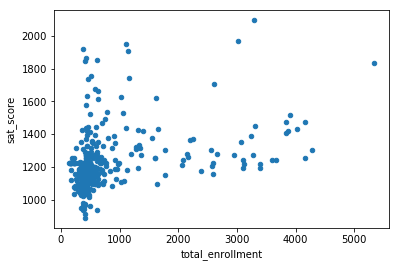

In [149]:
# enrollment seems to have such a strong correlation, so let's make a scatterplot of total_enrollment vs sat_score
# each point in the scatterplot will represent a high school

import matplotlib.pyplot as plt
%matplotlib inline

combined.plot.scatter(x='total_enrollment', y='sat_score');

In [150]:
# Filter the combined dataframe to keep only those rows where total_enrollment and sat_score  is under 1000.

low_enrollment = combined[(combined.total_enrollment < 1000) & (combined.sat_score < 1000)]
low_enrollment['SCHOOL NAME']

91                  INTERNATIONAL COMMUNITY HIGH SCHOOL
125                 ACADEMY FOR LANGUAGE AND TECHNOLOGY
126                     BRONX INTERNATIONAL HIGH SCHOOL
139               KINGSBRIDGE INTERNATIONAL HIGH SCHOOL
141               INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176    PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE
179                       HIGH SCHOOL OF WORLD CULTURES
188                  BROOKLYN INTERNATIONAL HIGH SCHOOL
225       INTERNATIONAL HIGH SCHOOL AT PROSPECT HEIGHTS
237                          IT TAKES A VILLAGE ACADEMY
253                           MULTICULTURAL HIGH SCHOOL
286              PAN AMERICAN INTERNATIONAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object

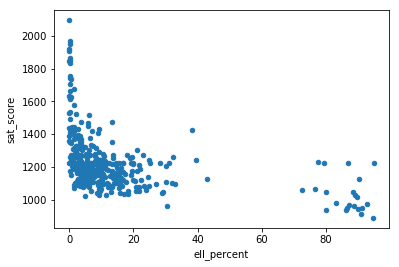

In [151]:
# these low enrollment schools have high percentages of English language learners, so let's explore correlation between sat_score and ell_percent 
combined.plot.scatter(x='ell_percent', y='sat_score');


C:\Users\Shiva\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3236: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\Users\Shiva\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3245: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


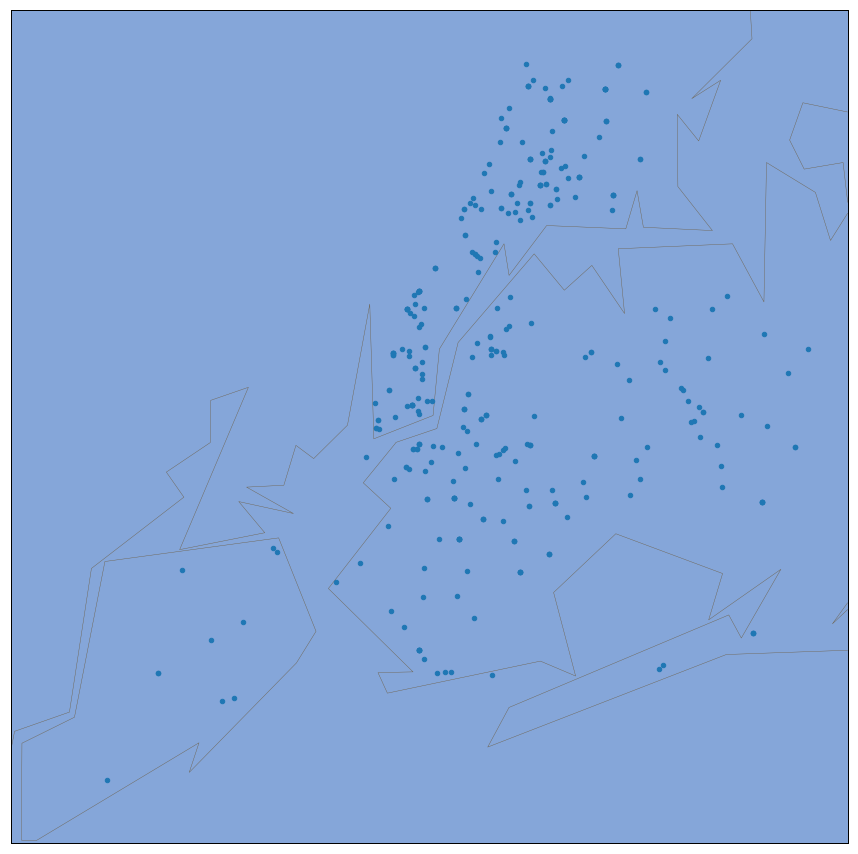

In [152]:
# it looks like ell_percent strongly coooreleates with sat_score except small numer of schools where  that have very high ell_percent values and low sat_score values.
# let's use geographical map to plot these schools on New York City map. 
# create a map that centers on New York City.
# convert our lat and lon coordinates from combined data to x and y coordinates so we can plot them on top of the New York City map. 

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

fig, axe = plt.subplots(figsize=(15,20))
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)

longitudes = combined.lon.tolist()
latitudes = combined.lat.tolist()
m.scatter(longitudes,latitudes,s=20,zorder=2,latlon=True);
plt.show()



C:\Users\Shiva\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3236: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\Users\Shiva\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3245: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


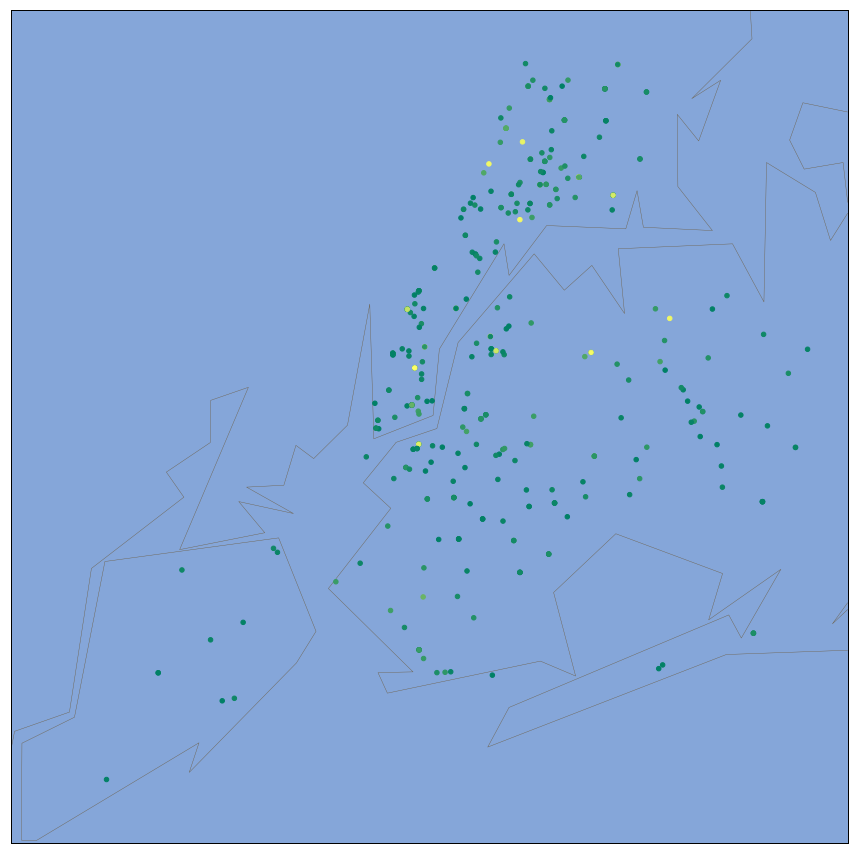

In [153]:
# From the map above, we can see that school density is highest in Manhattan (the top of the map), and lower in Brooklyn, the Bronx, Queens, and Staten Island.
# display percentage of English language learners by area.
# use summer colormap, which results in green points for low numbers, and yellow points for high numbers.
fig, axe = plt.subplots(figsize=(15,20))
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)

longitudes = combined.lon.tolist()
latitudes = combined.lat.tolist()
m.scatter(longitudes,latitudes,s=20,zorder=2,latlon=True,c=combined["ell_percent"],cmap="summer" );
plt.show()



In [157]:
# For granular statistics, we will plot aggregate by district and reste index to make school_dist a column again.

districts = combined.groupby('school_dist').agg(np.mean)
districts.reset_index(inplace=True)
districts.head()

,school_dist,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5,Total Cohort,CSD,...,priority08,priority09,priority10,Community Board,Council District,Census Tract,BIN,BBL,lat,lon
0,01,441.833333,473.333333,439.333333,1354.500000,116.681090,173.019231,135.800000,93.500000,1.0,...,0.0,0.0,0.0,3.000000,1.500000,1106.833333,1.004144e+06,1.003302e+09,40.719022,-73.982377
1,02,426.619092,444.186256,424.832836,1295.638184,128.908454,201.516827,157.495833,158.647849,2.0,...,0.0,0.0,0.0,4.204005,2.963296,1132.479744,1.103862e+06,1.070438e+09,40.739699,-73.991386
2,03,428.529851,437.997512,426.915672,1293.443035,156.183494,244.522436,193.087500,183.384409,3.0,...,0.0,0.0,0.0,7.500000,6.500000,166.666667,1.034931e+06,1.012833e+09,40.781574,-73.977370
3,04,402.142857,416.285714,405.714286,1224.142857,129.016484,183.879121,151.035714,113.857143,4.0,...,0.0,0.0,0.0,11.000000,8.000000,2637.000000,1.055874e+06,1.016681e+09,40.793449,-73.943215
4,05,427.159915,438.236674,419.666098,1285.062687,85.722527,115.725275,142.464286,143.677419,5.0,...,0.0,0.0,0.0,9.428571,8.142857,9372.571429,1.063080e+06,1.019721e+09,40.817077,-73.949251


C:\Users\Shiva\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3236: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\Users\Shiva\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3245: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


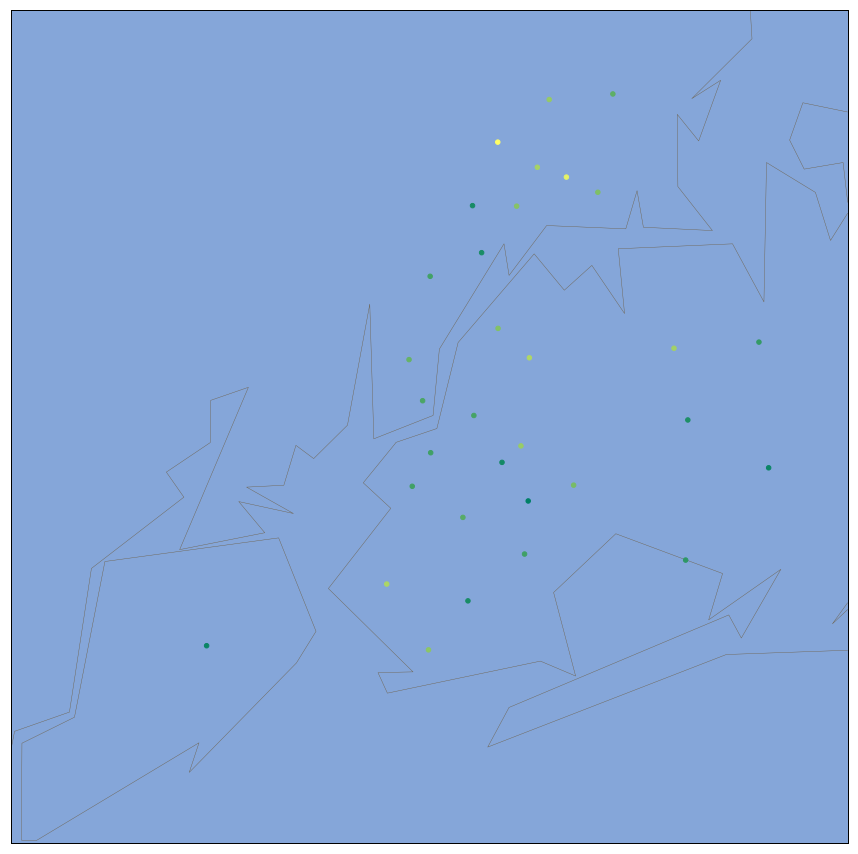

In [158]:
# plot out ell_percent by district

fig, axe = plt.subplots(figsize=(15,20))
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)

longitudes = districts.lon.tolist()
latitudes = districts.lat.tolist()
m.scatter(longitudes,latitudes,s=20,zorder=2,latlon=True,c=districts["ell_percent"],cmap="summer" );
plt.show()


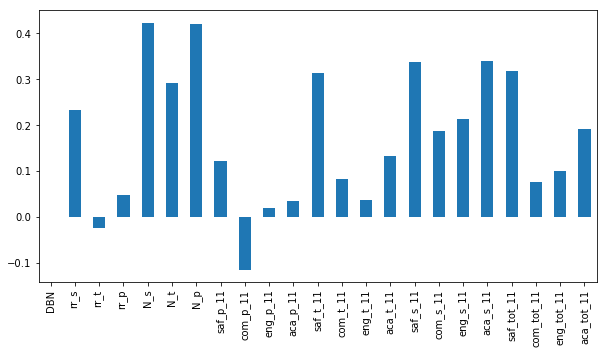

In [181]:
# Make a bar plot of the correlations between the survey fields and sat_score.
# Notice that there are high correlations between N_s, N_t, N_p and sat_score. 
# Also, students and teachers percieved safety (saf_t_11 and saf_s_11) have high correlation with sat_score.
fig, axe = plt.subplots(figsize=(10,5))
correlations[survey_cols].plot.bar();

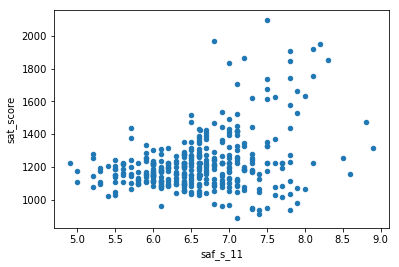

In [178]:
# Exploring safety using scatter plot
#  Notice that no school with a safety score lower than 6.5 has an average SAT score higher than 1500 or so.
combined.plot.scatter(x='saf_s_11',y='sat_score');

C:\Users\Shiva\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3236: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\Users\Shiva\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3245: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


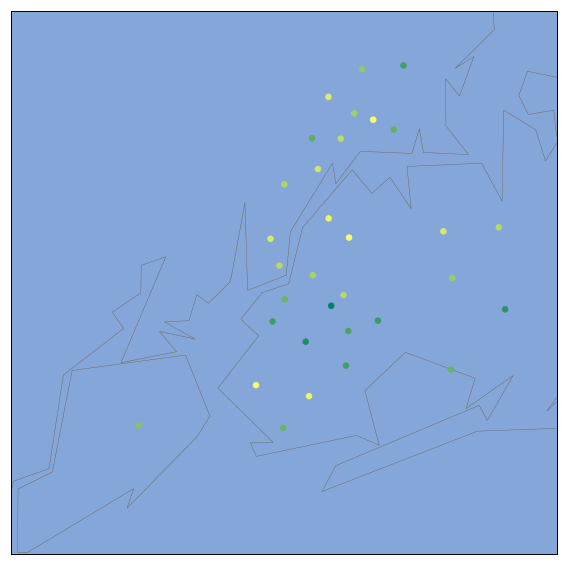

In [186]:
# Compute the average safety score for each district and map that shows safety scores by district
# It looks like Upper Manhattan and parts of Queens and the Bronx tend to have lower safety scores, 
# whereas Brooklyn has high safety scores.
fig, axe = plt.subplots(figsize=(10,10))
m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)

longitudes = districts.lon.tolist()
latitudes = districts.lat.tolist()
m.scatter(longitudes,latitudes,s=30,zorder=2,latlon=True,c=districts["saf_s_11"],cmap="summer" );
plt.show()

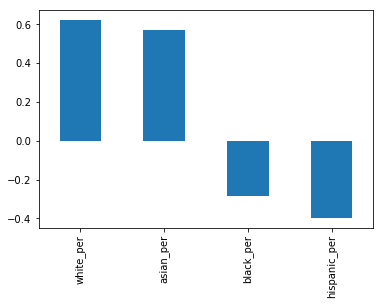

In [189]:
# compare any racial differences in SAT performance by plotting correlations between sta_score and race
# higher percentage of white or asian students at a school correlates positively with sat score, whereas a higher percentage 
# of black or hispanic students correlates negatively with sat score. 
# This may be due to a lack of funding for schools in certain areas, which are more likely to have a higher percentage 
# of black or hispanic students.
per_race = ["white_per","asian_per","black_per","hispanic_per"]
correlations[per_race].plot.bar();

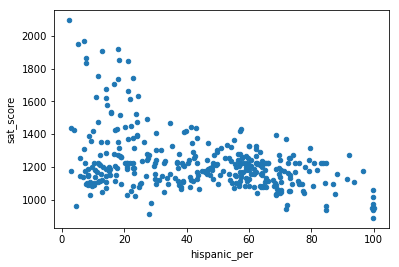

In [191]:
# Explore schools with low SAT scores and high values for hispanic_per
combined.plot.scatter(x="hispanic_per",y="sat_score");

In [195]:
# schools with highest percentage of hispanic_per have low sat scores
low_scores = combined[combined["hispanic_per"]>95]["SCHOOL NAME"]
low_scores.head()

44                         MANHATTAN BRIDGES HIGH SCHOOL
82      WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL
89     GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND M...
125                  ACADEMY FOR LANGUAGE AND TECHNOLOGY
141                INTERNATIONAL SCHOOL FOR LIBERAL ARTS
Name: SCHOOL NAME, dtype: object

In [199]:
# schools with a hispanic_per less than 10% and an average SAT score greater than 1800
# most of these schools appear to be STEM schools 
high_scores = combined[(combined["hispanic_per"]<10) & (combined["sat_score"]>1800)]["SCHOOL NAME"]
high_scores.head(10)

37                                STUYVESANT HIGH SCHOOL
151                         BRONX HIGH SCHOOL OF SCIENCE
187                       BROOKLYN TECHNICAL HIGH SCHOOL
327    QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...
356                  STATEN ISLAND TECHNICAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object

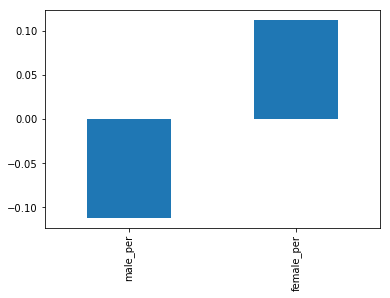

In [201]:
# plot gender differences in SAT scores
gender_cols = ["male_per","female_per"]
correlations[gender_cols].plot.bar();


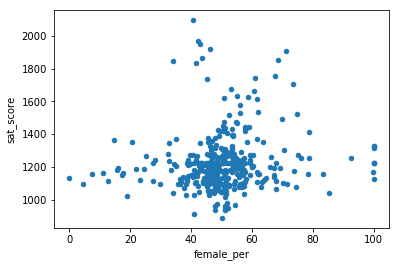

In [204]:
# scatter plot for female_per and higher SAT score 
combined.plot.scatter(x="female_per",y="sat_score");


In [202]:
# schools with a high female_per and higher SAT score 
high_female_scores = combined[(combined["female_per"]>60) & (combined["sat_score"]>1700)]["SCHOOL NAME"]
high_female_scores.head()

5                         BARD HIGH SCHOOL EARLY COLLEGE
26                         ELEANOR ROOSEVELT HIGH SCHOOL
60                                    BEACON HIGH SCHOOL
61     FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & A...
302                          TOWNSEND HARRIS HIGH SCHOOL
Name: SCHOOL NAME, dtype: object

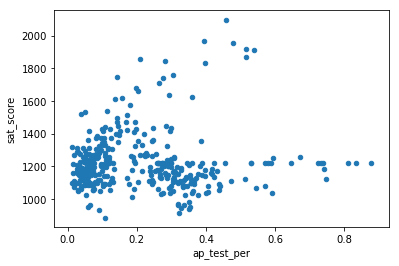

In [209]:
# compare AP exams and sat_scores
combined["ap_test_per"] = combined["AP Test Takers "]/combined["total_enrollment"]
combined.plot.scatter(x="ap_test_per",y="sat_score")